In [13]:
# 1 데이터셋 불러오기
import pandas as pd
df = pd.read_csv("/Users/yeongung/myenv/studynote/sparta/sparta_assignment/netflix_reviews.csv")  # 파일 불러오기

In [14]:
# 2 데이터 전처리
# 결측치 처리
df[df['userName'].isnull()]   # userName 열의 결측치 확인하기
df['userName'] = df['userName'].fillna('anonymous')   # userName 열의 결측치를 anonymous로 채우기

print(df['score'].min())   # score 최솟값 확인하기
print(df['score'].max())   # score 최댓값 확인하기

df[df['content'].isnull()]   # content 열의 결측치 확인하기
# content 열에 결측치가 있는 경우 score에 따라 내용을 채우는 함수 생성하기
def content_filled(row):
    if pd.isnull(row['content']):
        if row['score'] == 5:
            return 'I love it.'
        elif row['score'] == 4:
            return 'I like it.'
        elif row['score'] == 3:
            return 'So-so.'
        elif row['score'] == 2:
            return 'Not good.'
        elif row['score'] == 1:
            return 'Bad.'
    else:
        return row['content']

# content 열의 결측치 처리하기
df['content'] = df.apply(content_filled, axis=1)

df[df['reviewCreatedVersion'].isnull()]   # 결측치 확인하기
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].ffill()   # ffill() : 결측값을 바로 위 값과 동일하게 변경한다.

df[df['appVersion'].isnull()]   # appVersion 열의 결측치 확인하기
df['appVersion'] = df['appVersion'].ffill()   # ffill로 결측치 채우기

df.isnull().sum()

1
5


reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    2
at                      0
appVersion              2
dtype: int64

In [15]:
# 중복값 확인
df[df.duplicated()]    # 중복값 확인하기
df = df.drop_duplicates(keep='first')    # 중복값 제거하기
df.duplicated().sum()    # 중복값이 잘 제거됐는지 확인하기

0

In [16]:
df['content']
content = df['content']
socre = df['score']

In [17]:
import re
import nltk

<Axes: xlabel='Samples', ylabel='Counts'>

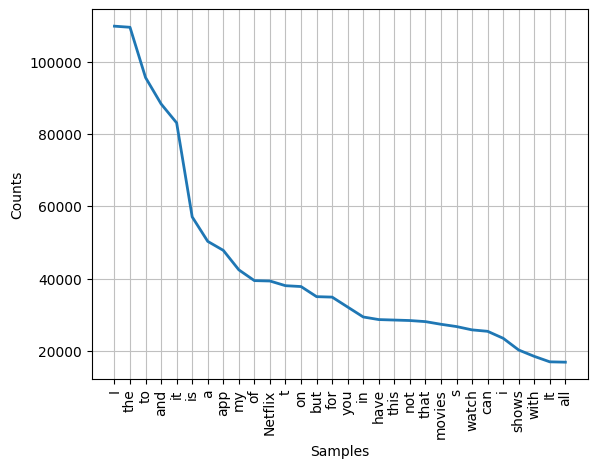

In [18]:
# 데이터 개요 파악
from nltk import Text 
# Text 클래스 선언: 통계 기능 사용 가능
from nltk.tokenize import RegexpTokenizer
# 정규표현식 조건을 적용한 뒤 토큰화

retokenize = RegexpTokenizer(r"[\w]+") # 문자만 출력
content_1st_lot = ' '.join(content)
lot_1 = Text(retokenize.tokenize(content_1st_lot))
lot_1.plot(30)

In [19]:
from nltk.corpus import stopwords
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/yeongung/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/yeongung/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/yeongung/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/yeongung/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/yeongung/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_da

True

In [20]:
stop_words = set(stopwords.words('english'))
additional_stopwords = {'app', 'netflix', 'show', 'time', 'series', 'phone', 'movie', 'tv', 'would', 'watch'}
stop_words = stop_words.union(additional_stopwords)
stop_words.discard('not')
# not 이 빠지면 의미가 달리지는 경우가 있어 불용어에서 제외

In [21]:
# 표제어 추출
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemma_v(sentence): # 동사
    return [lemmatizer.lemmatize(word, 'v') for word in sentence] 

def lemma_n(sentence): # 명사
    return [lemmatizer.lemmatize(word, 'n') for word in sentence]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yeongung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# 불필요한 품사 제거
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
def TagFitter(sentense):
  tokens = pos_tag(word_tokenize(sentense))
  tags = [t[0] for t in tokens if t[1] != "NNP" and t[1] != "NNPS" and t[1] != "PRP" and t[1] != "DT"]
  # 고유명사, 고유명사 복수형, 인칭 대명사, 관사 제거 
  
  return ' '.join(tags) 
# 문장 형태로 복원

In [23]:
# 't 는 토큰화 하면 의미 없는 t로 출력됨
# not으로 대체
def t_replacer(sentense):
  tokens = word_tokenize(sentense)
  r = []
  for token in tokens:
    if token == 't': 
      r.append('not')
    else: 
      r.append(token)
  return ' '.join(r)

In [24]:
# 철자 검토
from textblob import TextBlob
def WordCorrect(senntense):
  s = TextBlob(senntense)
  s = s.correct()
  s = ''.join(s)
  return s

In [25]:
# 전처리 함수 작성
def preprocessing(sentence):
  if isinstance(sentence, float): return '' # 실수형 데이터 제거, 문자형만
  cleaned = re.sub('[^a-zA-Z]', ' ', sentence) # 문자만
  cleaned = t_replacer(cleaned) # 't 를 not으로 대체
  cleaned = TagFitter(cleaned) # 태그를 기준으로 불필요한 품사 제ㄱ
  cleaned = cleaned.lower() # 소문자화
  cleaned = cleaned.strip() # 띄어쓰기 제외한 공백 제거
  cleaned = cleaned.split() # 문장 분할
  cleaned = lemma_v(cleaned) # 동사 원형화
  cleaned = lemma_n(cleaned) # 명사 원형화
  cleaned = [word for word in cleaned if word not in stop_words] 
  # 불용어 제거
  cleaned = ' '.join(cleaned) # 문장으로 복원
  # cleaned = WordCorrect(cleaned) # 철자 검사
  return cleaned

content[0:5].apply(preprocessing)

0                                             not open
1                                                 best
2    famous korean drama not dub sense pay subscrip...
3       superb please add comment section like youtube
4    reason not give four star opinion many foreign...
Name: content, dtype: object

In [26]:
content_2nd_lot = content.apply(preprocessing)
df['content_c'] = content.apply(preprocessing)
content_2nd_lot = ' '.join(content_2nd_lot)

<Axes: xlabel='Samples', ylabel='Counts'>

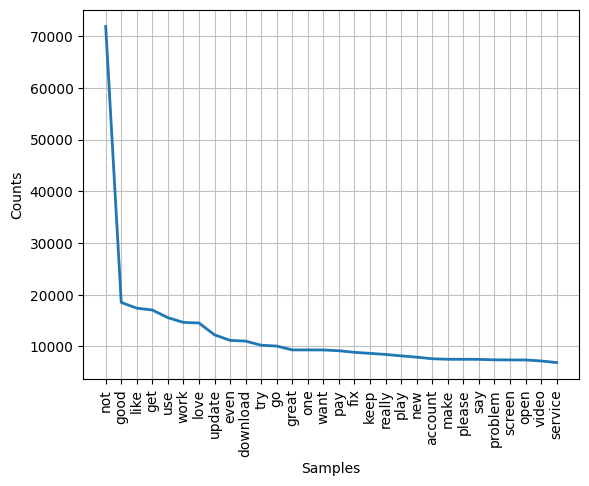

In [27]:
lot_2 = Text(word_tokenize(content_2nd_lot))
lot_2.plot(30)

In [28]:
# 감성 분석
# TextBlob 예시
def sentiment(sentense):
 senti = TextBlob(sentense).sentiment
 polar = senti.polarity
 return polar

In [29]:
test_lot = content[0:10].apply(preprocessing)

In [30]:
test1 = test_lot.apply(sentiment)
test1.head(10)

0    0.000000
1    1.000000
2    0.350000
3    1.000000
4    0.036667
5    0.000000
6    0.214286
7    0.700000
8    0.000000
9    0.000000
Name: content, dtype: float64

In [31]:
df['sentiment'] = (content.apply(preprocessing)).apply(sentiment)
df['sentiment']

0         0.000000
1         1.000000
2         0.350000
3         1.000000
4         0.036667
            ...   
116926    0.350000
116927    0.450000
116928    0.050000
116929   -0.500000
116930    0.500000
Name: sentiment, Length: 116644, dtype: float64

In [32]:
# 라벨링
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df[['content_c', 'score', 'sentiment_label']]

,content_c,score,sentiment_label
0,not open,1,neutral
1,best,5,positive
2,famous korean drama not dub sense pay subscrip...,2,positive
3,superb please add comment section like youtube,5,positive
4,reason not give four star opinion many foreign...,1,neutral
...,...,...,...
116926,really like many kdramas,5,positive
116927,love always enjoy use,5,positive
116928,sound quality slow,1,neutral
116929,rate expensive bcos see sunday charge hole month,1,negative


In [33]:
pos = df[df['sentiment_label'] == 'positive']
neu = df[df['sentiment_label'] == 'neutral']
neg = df[df['sentiment_label'] == 'negative']

In [34]:
positive = pos['content_c']
neutral = neu['content_c']
negative = neg['content_c']

In [35]:
# 토픽 추출
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora

In [36]:
# 워드클라우드에 not 포함되지 않도록 not 제거
rm_not = ['not']

def remove_not(sentense):
  cleaned = sentense.split()
  cleaned = [word for word in cleaned if word not in rm_not]
  cleaned = ' '.join(cleaned)
  return cleaned

In [37]:
# Latent Dirichlet Allocation
# 잠재 디리클레 할당: 문서집합에서 토픽을 찾아내는 프로세스
from gensim.models import LdaModel
def LDA_model(serise):
  preprocessed = serise.apply(simple_preprocess) # 전처리
  dictionary = corpora.Dictionary(preprocessed) # 코퍼스 생성
  bow = [dictionary.doc2bow(doc) for doc in preprocessed] # Bag of Word ; 단어집 생성
  return LdaModel(bow, num_topics=1, id2word=dictionary, passes=10) # passes : 반복 횟수

pos_model = LDA_model(positive)
neu_model = LDA_model(neutral)
neg_model = LDA_model(negative)

In [38]:
pos_model.show_topic(0)

[('good', 0.035068598),
 ('not', 0.034440856),
 ('love', 0.033409692),
 ('great', 0.017609201),
 ('like', 0.01623366),
 ('best', 0.014766818),
 ('get', 0.010869427),
 ('really', 0.01084202),
 ('use', 0.009841774),
 ('new', 0.00787021)]

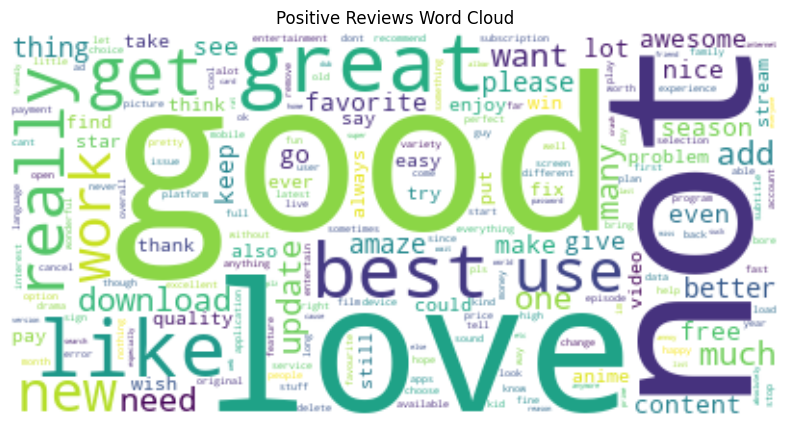

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for idx in range(pos_model.num_topics):
    word_freq = dict(pos_model.show_topic(idx, topn=200))  
    # 인덱스 를 사용하여 단어와 빈도수 가져오기
    # topn : 가져올 단어 수
    
    # 워드클라우드 생성
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(word_freq) # 빈도수

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear') # 보간법 = 선형
    plt.axis('off')  # 축 제거
    plt.title('Positive Reviews Word Cloud')
    plt.show()

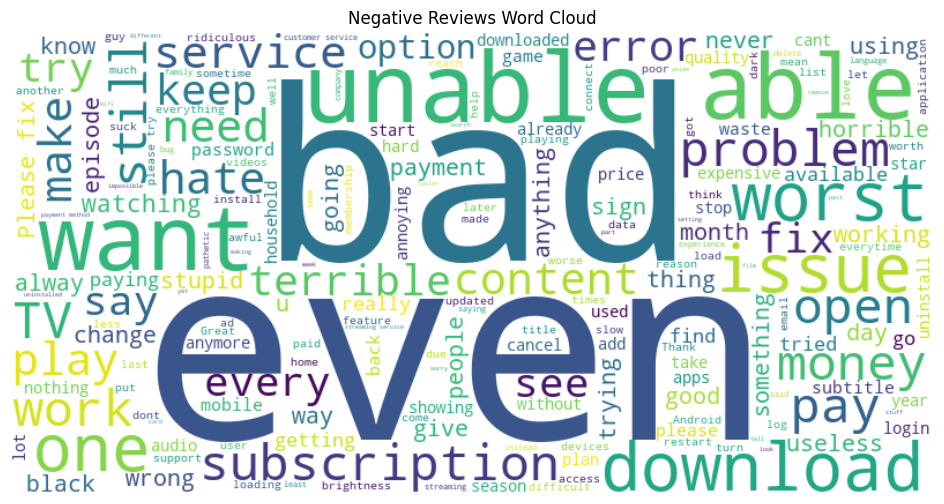

In [40]:
# WordCloud 제작
# 필요 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS # STOPWORDS : 사용하지 않을 단어들(불용어),  type(STOPWORDS) - set

# 부정적인 리뷰 필터링 : #5번에서 분류한 'sentiment_label' 열에서 값이 'negative' 인 행 선택-> 필터링 된 df 에서 'content' 열 선택해 부정적 리뷰 텍스트 추출
negative_reviews = ' '.join(df[df['sentiment_label'] =="negative"]['content'])

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','account','netflix','use','im','new','will','shows','video','screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies'])
# update() 메서드 : 주로 set 과 dict 형태에 사용됨. 주어진 리스트,튜플,집합 등의 요소를 현재 집합에 추가. 중복 요소 무시


# WordCloud 생성 : WordCloud(font_path='폰트경로',width=가로크기,height=세로크기,max_words=최대단어수,background_color=배경색,colormap=단어색상)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews) # generate() : 주어진 텍스트 데이터를 기반으로 워드 클라우드를 만듬

# WordCloud 출력
plt.figure(figsize=(12, 6)) # figure() : 그림 크기를 지정하고 그림 생성
plt.imshow(wordcloud, interpolation='bilinear') # bilinear : 이미지 렌더링으로 이미지 자연스럽게 보이게 만듬
plt.axis('off') # 축 숨기기
plt.title('Negative Reviews Word Cloud') # 제목
plt.show()

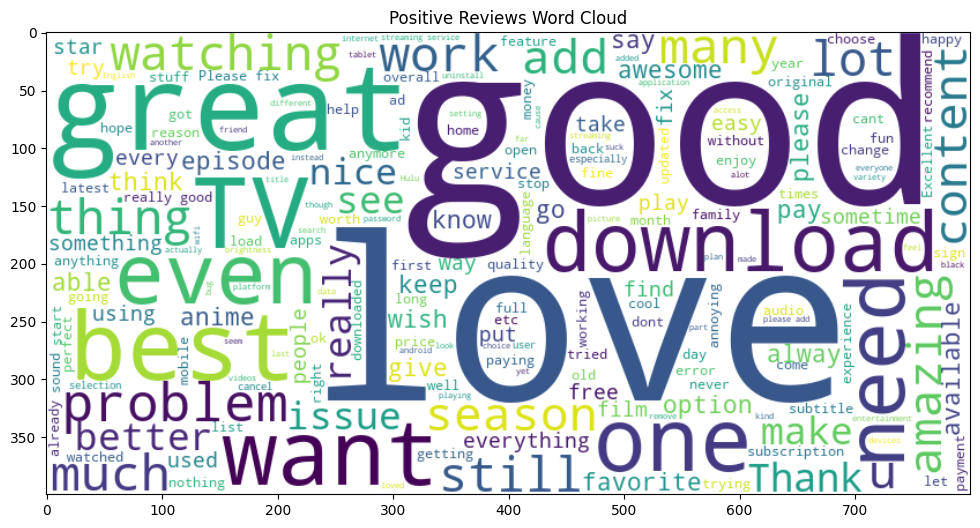

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 긍정적 리뷰 필터링 : #5번에서 분류한 'sentiment_label' 열에서 값이 'positive' 인 행 선택-> 필터링 된 df 에서 'content' 열 선택해 긍정적 리뷰 텍스트 추출
positive_reviews = ' '.join(df[df['sentiment_label'] =="positive"]['content'])

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','account','netflix','use','im','new','will','shows','video','screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies'])
# update() 메서드 : 주로 set 과 dict 형태에 사용됨. 주어진 리스트,튜플,집합 등의 요소를 현재 집합에 추가. 중복 요소 무시

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(positive_reviews)

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off') - 궁금해서 축 활성화 
plt.title('Positive Reviews Word Cloud')
plt.show()